<center>
  <font size="8">Abstractive Text Summarization</font><br>
  

In the digital age, we have access to a lot of online information. However,
reading all of it takes time. Text summarization can help by shortening the text while still keeping important information. Our project uses fuzzy logic and a neural network to extract key sentences. Specifically, we use neural networks to determine the optimal weights for aggregating different feature scores that indicate the importance of sentences in the BBC dataset. The final outcome of this project is the creation of a neural network model with appropriate loss and metric functions, which will produce the optimal weights for aggregating various NLP feature scores.



## We are working on <font color= red>Politics </font>
[BBC News Summary/News Article/politics](https://drive.google.com/drive/folders/1mzVdLFmImv86M6tFa03DxrEIelqKIQQU?usp=share_link)

The summary section can be found udner BBC News Summary/Summaries/politics

## Main tasks


**Install packages:**

In [ ]:
!pip install -U textblob
!python -m textblob.download_corpora lite
!python -m textblob.download_corpora
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
Finished.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package c

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB         # Naive Bayes
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
import nltk
from nltk import word_tokenize, pos_tag
import re
import matplotlib.pyplot as plt

%matplotlib inline

## Get a copy of the data to your own Google drive
Step 1. Use [this chrome app](https://script.google.com/macros/s/AKfycbxbGNGajrxv-HbX2sVY2OTu7yj9VvxlOMOeQblZFuq7rYm7uyo/exec) to copy the[ BBC News Summary](https://drive.google.com/drive/folders/1ZryN8xuRFi0LNYPS1zfZ43RsuW0L6lij?usp=share_link) folder that I shared with you to your own drive.  
Step 2. Put the copied folder in the exact path under your Google drive, i.e., ``` /content/drive/MyDrive/sharedata/BBC News Summary ```, so you collaborate with your team members and get graded subsequently.   


In [ ]:
#1 Mount the Google drive in preparation for data access
!pip install -U path.py
import os
from path import Path
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<a id='load_data'></a>

### Load the data

---

Import the assinged data into a pandas DataFrame.

In [ ]:
corpus = []
# https://drive.google.com/drive/folders/1mzVdLFmImv86M6tFa03DxrEIelqKIQQU?usp=share_link
corpus_dir = Path('/content/drive/MyDrive/sharedata/BBC News Summary/News Articles/politics')
#corpus_dir = Path('/content/drive/MyDrive/sharedata/BBC News Summary/Summaries/politics')
file_number = []
for file_path in corpus_dir.files('*.txt'):
    file = file_path[-7:-4]
    with file_path.open(mode='rt', encoding='utf-8') as fp:
        lines = fp.read().splitlines()
        corpus.append([i for i in lines if i])
        file_number.append(int(file))

### Show what the first txt file looks like

In [ ]:
corpus[0]

["'Debate needed' on donations cap",
 'A cap on donations to political parties should not be introduced yet, the elections watchdog has said.',
 'Fears that big donors can buy political favours have sparked calls for a limit. In a new report, the Electoral Commission says it is worth debating a £10,000 cap for the future but now is not the right time to introduce it. It also says there should be more state funding for political parties and candidates should be able to spend more on election campaigning.',
 'There were almost £68m in reported donations to political parties in 2001, 2002 and 2003, with nearly £12m of them from individual gifts worth more than £1m. The rules have already been changed so the public can see who gives how much to the parties but the report says there are still public suspicions. The commission says capping donations would mean taxpayers giving parties more cash - something which would first have to be acceptable to the public and shown to work. "While we are

### How many txt files are under your assigned folder?

In [ ]:
print('There are {} text files under my assigned folder'.format(len(corpus)))

There are 417 text files under my assigned folder


#### Data Preprocessing

In [ ]:
input_original = []
input_stemming = []
input_lemmatization = []
stemmer = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()
text_number = []
index = 0
sentence_original = []
while index < len(corpus):
  x = corpus[index]
  file = file_number[index]
  for paragraph in x:
    string = TextBlob(paragraph)
    for sentence in string.sentences:
      # isalpha() checks whether all characters in the string are alphabetic and there is at least one character, false otherwise
      hasLetters = any(c.isalpha() for c in str(sentence))
      if hasLetters:
        sentence_original.append(str(sentence))
        input_original.append(str(sentence).replace(",", "").replace("\"", "").replace("\'", "").replace("?", ".").replace("!", ".").replace(".", "").replace("...", ""))
        text_number.append(file)
        # In simple words stemming is reducing a word to its base word or stem in such a way that the words of similar kind lie under a common stem.
        input_stemming.append(" ".join([stemmer.stem(word) for word in sentence.words]))
        input_lemmatization.append(" ".join([lemmatizer.lemmatize(word) for word in sentence.words]))
  index += 1
df_sentences = pd.DataFrame(sentence_original, columns = ['original_sentence'])
df_sentences['sentences'] = input_original
df_sentences['stemming'] = input_stemming
df_sentences['lemmatization'] = input_lemmatization
df_sentences['file_number'] = text_number
df_sentences[df_sentences['file_number'] == 1].head(10)

,original_sentence,sentences,stemming,lemmatization,file_number
3056,Labour plans maternity pay rise,Labour plans maternity pay rise,labour plan matern pay rise,Labour plan maternity pay rise,1
3057,Maternity pay for new mothers is to rise by £1...,Maternity pay for new mothers is to rise by £1...,"matern pay for new mother is to rise by £1,400...","Maternity pay for new mother is to rise by £1,...",1
3058,It would mean paid leave would be increased to...,It would mean paid leave would be increased to...,it would mean paid leav would be increas to ni...,It would mean paid leave would be increased to...,1
3059,Other plans include letting maternity pay be g...,Other plans include letting maternity pay be g...,other plan includ let matern pay be given to f...,Other plan include letting maternity pay be gi...,1
3060,The Tories dismissed the maternity pay plan as...,The Tories dismissed the maternity pay plan as...,the tori dismiss the matern pay plan as desper...,The Tories dismissed the maternity pay plan a ...,1
3061,"Ms Hewitt said: ""We have already doubled the l...",Ms Hewitt said: We have already doubled the le...,ms hewitt said we have alreadi doubl the lengt...,Ms Hewitt said We have already doubled the len...,1
3062,"""We are going to extend the pay to nine months...",We are going to extend the pay to nine months ...,we are go to extend the pay to nine month by 2...,We are going to extend the pay to nine month b...,1
3063,She said new mothers were already entitled to ...,She said new mothers were already entitled to ...,she said new mother were alreadi entitl to 12 ...,She said new mother were already entitled to 1...,1
3064,"""We have made a firm commitment.",We have made a firm commitment,we have made a firm commit,We have made a firm commitment,1
3065,"We will definitely extend the maternity pay, f...",We will definitely extend the maternity pay fr...,we will definit extend the matern pay from the...,We will definitely extend the maternity pay fr...,1


In [ ]:
print(len(input_original))
print(len(text_number))
print(len(sentence_original))

9175
9175
9175


<a name='tokenize'></a>

### 1. Tokenize all sentences in the give survey dataset with TFIDF.

From the above cell, we know that there are 9175 sentences in the given dataset if we include the title as a single sentence. We then use TfidVectorizer() with default parameter and see we have 9175 rows and 11517 columns in the resultant dataframe.


In [ ]:
tvec = TfidfVectorizer()
X = tvec.fit_transform(input_original)
X.shape

(9175, 11574)

In [ ]:
df_special = pd.DataFrame(X.toarray(), columns = tvec.get_feature_names_out())
df_special

,0001,050505,0530gmt,053bn,06,07,0800,09,10,100,...,yushchenko,yvette,zambia,zambian,zeal,zealand,zero,zhaoxing,zimbabwe,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9170,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9173,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<a name='stopwords'></a>

### 2. Show the top words

- Visualize them with a bar chart with frequency in y axis and words in the x-axis
- You may selectively choose top words as the stop words for your processing needs

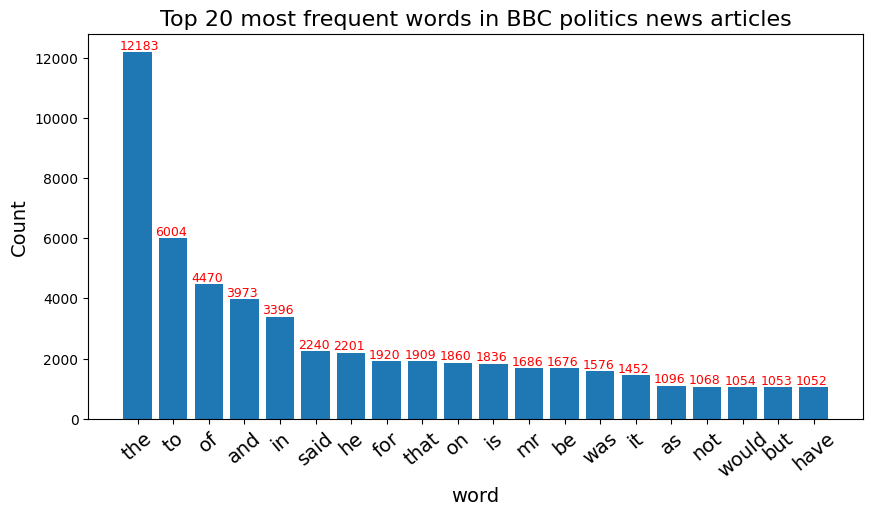

In [ ]:

# vectorize while keeping original counts
cvec = CountVectorizer()
X_vect = cvec.fit_transform(input_original)
X = pd.DataFrame(X_vect.toarray(),
                          columns=cvec.get_feature_names_out())

# empty dictionary
top_words = {}

# loop through columns
for i in X.columns:
    # save sum of each column in dictionary
    top_words[i] =  X[i].sum()
# top_words to dataframe sorted by highest occurance
most_freq = pd.DataFrame(sorted(top_words.items(), key = lambda x: x[1], reverse = True))

plt.figure(figsize = (10, 5))
# visualize top 20 words
plt.bar(most_freq[0][:20], most_freq[1][:20]);
plt.title("Top 20 most frequent words in BBC politics news articles",fontsize=16)
plt.ylabel("Count",fontsize=14)
plt.xlabel("word",fontsize=14)
plt.xticks(fontsize=14, rotation=40)

for i, v in enumerate(most_freq[1][:20]):
  plt.text(i-0.5,v+100, str(v), color='red',fontsize=9)

### After preprocessing the text, it is necessary to extract features and calculate the functions of the sentence, the results of which are vectors of several elements for each sentence. The elements of each vector take values in the interval [0, 1]. We consider the following features

## Write a function for each of the features below that would return the feature score for any given sentence

<a name='title'></a>

### 3. Title feature (F1)
It is defined as a ratio of the number of matches of the Title words (Tw) in the current sentence (S) to the number of words (w) of the Title (T)   

<img alt="F1" src="https://drive.google.com/uc?export=view&id=1J1GGrkuGcHhPlGRIo7xmPlwHLe0I2LcV">

In [ ]:
# Calculating Title Feature
def F1(sentence, df, col):

  # df is the dataframe that represents the article
  title = df.loc[0,col ]
  title = title.lower().replace("'s",'')
  titleList = title.split(" ")
  sentence = sentence.lower().replace("'s",'')
  sentenceList = sentence.lower().split(" ")
  numTw_inS =  len(list(set(titleList) & set(sentenceList)))
  numWord_inT = len(titleList)
  #print('Title word in Sentence: ',list(set(titleList) & set(sentenceList)) )
  return numTw_inS/numWord_inT


<a name='sentencelength'></a>

### 4. Sentence Length (F2)
It is defined as a ratio of the number of words (w) in the current sentence (S) to the number of words in the longest sentence (LS) in the text.   

<img alt="F2" src="https://drive.google.com/uc?export=view&id=1b42IWpr5svaCyQl6fdnGNWaLP3Rv4bgK">

In [ ]:
def F2(sentence, df,col):
  max = 0
  current = len(sentence.split(' '))
  for i in range(df.shape[0]):
    other_sentence = df.loc[i,col]
    if (len(other_sentence.split(' ')) > max):
      max = len(df.loc[i, col].split(' '))
  # print (current, max)
  return current/max

<a name='position'></a>

### 5. Sentence position (F3)
It is defined as a maximum of the next two relations   

<img alt="F3" src="https://drive.google.com/uc?export=view&id=1WNqhFyRSkFR7RaGqtZaywOmQVBrUJyb0">


In [ ]:
# from nltk.tokenize import sent_tokenize

def F3(sentence, df,col):
  pos_of_s = df.index[df[col] == sentence]
  pos_of_s = pos_of_s[0]
  num_of_s = df.shape[0] - 1
  return max(1/pos_of_s, 1/(num_of_s - pos_of_s + 1))

<a name='tfidf'></a>

### 6. Term Weight (F4)
It is defined as a ratio of the sum of the frequencies of term occurrences (TO) in a sentence (S) to the sum of the frequency of term occurrences in the text.   

<img alt="F5" src="https://drive.google.com/uc?export=view&id=1wS8NV1otHFjgu4NePxkyPwQXFpZ4f93q">


In [ ]:
def F4(sentence, df,col):
  vect = CountVectorizer()
  s = sentence
  s = [s]
  array1 = vect.fit_transform(s).toarray().sum(axis=0)
  array2 = 0
  # loop to calculate TO in that article
  for i in range(df.shape[0]):
    c = df.loc[i, col]
    c = [c]
    array2 = array2 + vect.transform(c).toarray().sum(axis=0)
  return sum(array1)/sum(array2)

<a name='propernoun'></a>

### 7. Proper Noun (F5):     
It is defined as a ratio of the number of proper nouns (PN) in a sentence (S) to the length (L) of a sentence

<img alt="F6" src="https://drive.google.com/uc?export=view&id=1MEBknA87K-vPSlu061F-hOz_c9aHrl6W">

In [ ]:
def F5(sentence, df):
  tokens = word_tokenize(sentence)
  pos = pos_tag(tokens)
  count = 0
  score = 0
  for i in range(len(pos)):
    # NNP is tag for singular proper noun. NNPS is for plural proper noun
    if (pos[i][1] == 'NNP') or (pos[i][1] == 'NNPS'):
      count += 1
  # Not sure if I should use len(sentence.split()) or len(tokens)
  score = count/len(sentence.split(' '))
  return score

<a name='numerical'></a>

### 8.Numerical Data (F6)
 It is defined as a ratio of the number of numerical data (ND) in the sentence (S) to the length (L) of the sentence   

 <img alt="F7" src="https://drive.google.com/uc?export=view&id=1tCaSaipvqs3CvpvISyCR5ytNzDCuwJV5">


In [ ]:
# The funciton itself
def F6(S, df):
  prev = False # keeps track if previous was numeric so numbers in the sentence llike '47' is counted once
  count = 0 # number of numeric data occurences
  for w in S:
    if w.isnumeric() and not prev:
      prev = True
      count = count + 1
    if not w.isnumeric():
      prev = False
  return count / len(S.split(' '))

<a name='combine'></a>

### 9. Combining feature vectors to decide which are representative statements
Propose a formula that combines the F scores for any given sentence.   

Explain why your formula would allow you to identify the most important sentences as a possible summary of the original article.   

Justify your formula with reasons


Our proposed formula (f1, f2, ..., f6 represent function 1, function 2, ..., function 6):

scoresF = (20*f1 + 10*f2 + 10*f3 + 10*f4 + 15*f5 + 5*f6) / (20+10+10+10+15+5)

* We determined function 1 to be very important because we have political news articles so typically sentences that repeat the title words will be more relevant to the main point of the article. We determined that function 6 is less important for political news articles. Although sentences with numeric data can be important sometimes the best sentence to represent an article will be focussed more on main ideas instead of specific facts / numbers. The rest of the functions we felt were of nuetral importance.

In [ ]:
'''
f1 = titleFeature(sentence) (important)
f2 = number of words in the sentence compared to number of words in longest sentence (neutral)
f3 = sentence position (neutral) # only matters per paragraph but when there are multiple paragraphs the first sentence in the article might not be as important
f4 = how many terms in the sentence appear elsewhere in the article (neutral)
f5 = number of proper nouns in a sentence (mildly important) # some articles it will matter and some it won't
f6 = numeric data contained in the sentence (not important)
scoresF = (20*f1 + 10*f2 + 10*f3 + 10*f4 + 15*f5 + 5*f6) / (20+10+10+10+15+5)
'''
# baseline is 10 if it is average importance

"\nf1 = titleFeature(sentence) (important)\nf2 = number of words in the sentence compared to number of words in longest sentence (neutral)\nf3 = sentence position (neutral) # only matters per paragraph but when there are multiple paragraphs the first sentence in the article might not be as important\nf4 = how many terms in the sentence appear elsewhere in the article (neutral)\nf5 = number of proper nouns in a sentence (mildly important) # some articles it will matter and some it won't\nf6 = numeric data contained in the sentence (not important)\nscoresF = (20*f1 + 10*f2 + 10*f3 + 10*f4 + 15*f5 + 5*f6) / (20+10+10+10+15+5)\n"

<a name='validation'></a>

### 10. Validation
With your formula, show a one sentence summary of each of the given article in your assigned data folder.    

Provide an interactive code below for users to enter a random number, say 42, and view the original article (042.txt) and the deduced matching one sentence summary


In [ ]:
# 42 need to find out the corpus index for it so
def experiment(article_id):
  df = df_sentences[df_sentences['file_number'] == article_id].copy()
  df.reset_index(inplace = True, drop = True)

  max_score = 0
  index = 0
  scoresF = 0
  col = 'sentences'
  for ind in range(df.shape[0]):
    if (ind != 0):
      s = df.loc[ind, 'sentences']
      # print (s)
      scoresF = (20*F1(s, df,col) + 10*F2(s, df,col) + 10*F3(s, df,col) + 10*F4(s, df,col) + 15*F5(s, df) + 5*F6(s, df))/70
      # print ('score: ', round(scoresF,3))
      if scoresF > max_score:
        max_score = scoresF
        index = ind
  if len(str(article_id)) == 1:
    txt = '/00' + str(article_id) + '.txt'
    path = corpus_dir + txt
  elif len(str(article_id)) == 2:
    txt = '/0' + str(article_id) + '.txt'
    path = corpus_dir + txt
  else:
    txt = '/' + str(article_id) + '.txt'
    path = corpus_dir + txt

  print('****************** The Original Article ************************************')
  with path.open(mode='rt', encoding='utf-8') as fp:
        print(fp.read())
  print('----------------------------------------------------------------------')
  print ('The deduced matching one sentence summary: ', df.loc[index, 'original_sentence'])


---
Here we test the function that will prompt the user to select a random article to evaluate its sentences. For our output we print out the original article and then the deduced one sentence summary for the given article. The user will be prompted again if they want to enter another article number.

In [ ]:
reply = 'Y'
while reply == 'Y' or reply =='y':
  article_id = int(input("Enter an article number (eg: 5, 56, 123): "))
  print(experiment(article_id))
  print('************************************************************************')
  print("Do you want to enter another article")
  print("If Yes, please enter : Y")
  print("If No, please enter other keys")
  reply = input("")

print("Have a nice day!!! :D ")

Enter an article number (eg: 5, 56, 123): 56
****************** The Original Article ************************************
Citizenship event for 18s touted

Citizenship ceremonies could be introduced for people celebrating their 18th birthday, Charles Clarke has said.

The idea will be tried as part of an overhaul of the way government approaches "inclusive citizenship" particularly for ethnic minorities. A pilot scheme based on ceremonies in Australia will start in October. Mr Clarke said it would be a way of recognising young people reaching their voting age when they also gain greater independence from parents. Britain's young black and Asian people are to be encouraged to learn about the nation's heritage as part of the government's new race strategy which will also target specific issues within different ethnic minority groups. Officials say the home secretary wants young people to feel they belong and to understand their "other cultural identities" alongside being British. The lau

<a name='experiment'></a>

### 11. Experiment with removing stopwords, lemmatization, and stemming options in vectorizing the given dataset.
- Repeat steps above with one of the three options and see which would be able to return a more representative summary sentence for any given articles in your assigned domain
- Consider using your customized stopwords list to enhance results.
- What combination of these three options give you the best result.
- Explain the why the combination option would yields a representative sentence.


We decide to use the top 20 words be our stopwords.  

---
Here a data frame is made where each column is the dataset with a different combination of preprocessing techniques.

In [ ]:
# removing stop word
stop_word = most_freq[0][:20].to_list()
df_sentences['stopword'] = df_sentences['sentences'].apply(lambda x: ' '.join([item for item in x.lower().split() if item not in stop_word]))
# Combination
stemmer = SnowballStemmer('english')
# Stopword then Stemming
df_sentences['stopword_stem'] = df_sentences['stopword'].apply(lambda x:' '.join([stemmer.stem(y) for y in x.split()]))
#Stopword the Lemmatization
lemmatizer = WordNetLemmatizer()
df_sentences['stopword_lem'] = df_sentences['stopword'].apply(lambda x:' '.join([lemmatizer.lemmatize(y) for y in x.split()]))
#Stemming then Lemmatization
df_sentences['stem_lem'] = df_sentences['stemming'].apply(lambda x:' '.join([lemmatizer.lemmatize(y) for y in x.split()]))
#Stemming then Lemmatization then Stopword
df_sentences['stem_lem_stopword'] = df_sentences['stem_lem'].apply(lambda x: ' '.join([item for item in x.lower().split() if item not in stop_word]))

---
This function will output the best sentences for a given article_id based on the original dataset with no processing, each individual preprocessing technique, and each combination of preprocessing techniques.

In [ ]:
def experiment2(article_id):

  df1 = df_sentences[df_sentences['file_number'] == article_id].copy()
  df1.reset_index(inplace = True, drop = True)

  max_score_orignal = 0
  max_score_stem = 0
  max_score_lem = 0
  max_score_stop = 0
  max_score_stop_stem = 0
  max_score_stop_lem = 0
  max_score_stem_lem = 0
  max_score_stem_lem_stopword = 0

  index_orignal = 0
  index_stem = 0
  index_lem = 0
  index_stop = 0
  index_stop_stem = 0
  index_stop_lem= 0
  index_stem_lem= 0
  index_stem_lem_stopword= 0

  scoresF = 0
  #print(df1['stemming'])
  option = ['sentences', 'stemming','lemmatization','stopword','stopword_stem', 'stopword_lem', 'stem_lem', 'stem_lem_stopword']
  for ind in range(df1.shape[0]):

    if (ind != 0):
      #print('hello')
      s0 = df1.loc[ind, option[0]]
      s1 = df1.loc[ind, option[1]]
      s2 = df1.loc[ind, option[2]]
      s3 = df1.loc[ind, option[3]]
      s4 = df1.loc[ind, option[4]]
      s5 = df1.loc[ind, option[5]]
      s6 = df1.loc[ind, option[6]]
      s7 = df1.loc[ind, option[7]]

      scoresF_origion = (20*F1(s0, df1,option[0]) + 10*F2(s0, df1,option[0]) + 10*F3(s0, df1,option[0]) + 10*F4(s0, df1,option[0]) + 15*F5(s0, df1) + 5*F6(s0, df1))/70
      scoresF_stem = (20*F1(s1, df1,option[1]) + 10*F2(s1, df1,option[1]) + 10*F3(s1, df1,option[1]) + 10*F4(s1, df1,option[1]) + 15*F5(s1, df1) + 5*F6(s1, df1))/70
      scoresF_lem = (20*F1(s2, df1,option[2]) + 10*F2(s2, df1,option[2]) + 10*F3(s2, df1,option[2]) + 10*F4(s2, df1,option[2]) + 15*F5(s2, df1) + 5*F6(s2, df1))/70
      scoresF_stopw = (20*F1(s3, df1,option[3]) + 10*F2(s3, df1,option[3]) + 10*F3(s3, df1,option[3]) + 10*F4(s3, df1,option[3]) + 15*F5(s3, df1) + 5*F6(s3, df1))/70
      scoresF_stop_stem = (20*F1(s4, df1,option[4]) + 10*F2(s4, df1,option[4]) + 10*F3(s4, df1,option[4]) + 10*F4(s4, df1,option[4]) + 15*F5(s4, df1) + 5*F6(s4, df1))/70
      scoresF_stop_lem= (20*F1(s5, df1,option[5]) + 10*F2(s5, df1,option[5]) + 10*F3(s5, df1,option[5]) + 10*F4(s5, df1,option[5]) + 15*F5(s5, df1) + 5*F6(s5, df1))/70
      scoresF_stem_lem= (20*F1(s6, df1,option[6]) + 10*F2(s6, df1,option[6]) + 10*F3(s6, df1,option[6]) + 10*F4(s6, df1,option[6]) + 15*F5(s6, df1) + 5*F6(s6, df1))/70
      scoresF_stem_lem_stopword= (20*F1(s7, df1,option[7]) + 10*F2(s7, df1,option[7]) + 10*F3(s7, df1,option[7]) + 10*F4(s7, df1,option[7]) + 15*F5(s7, df1) + 5*F6(s7, df1))/70
      if scoresF_origion > max_score_orignal:

        max_score_orignal = scoresF_origion
        index_orignal = ind
      if scoresF_stem > max_score_stem:
        max_score_stem = scoresF_stem
        index_stem = ind
      if scoresF_lem > max_score_lem:
        max_score = scoresF_lem
        index_lem = ind
      if scoresF_stopw> max_score_stop:
        max_score_stop = scoresF_stopw
        index_stop = ind
      if scoresF_stop_stem> max_score_stop_stem:
        max_score_stop_stem = scoresF_stop_stem
        index_stop_stem = ind
      if scoresF_stop_lem> max_score_stop_lem:
        max_score_stop_lem = scoresF_stop_lem
        index_stop_lem = ind
      if scoresF_stem_lem> max_score_stem_lem:
        max_score_stem_lem = scoresF_stem_lem
        index_stem_lem = ind
      if scoresF_stem_lem_stopword> max_score_stem_lem_stopword:
        max_score_stem_lem_stopword = scoresF_stem_lem_stopword
        index_stem_lem_stopword = ind

  if len(str(article_id)) == 1:
    txt = '/00' + str(article_id) + '.txt'
    path = corpus_dir + txt
  elif len(str(article_id)) == 2:
    txt = '/0' + str(article_id) + '.txt'
    path = corpus_dir + txt
  else:
    txt = '/' + str(article_id) + '.txt'
    path = corpus_dir + txt

  print('****************** The Original Article ************************************')
  with path.open(mode='rt', encoding='utf-8') as fp:
        print(fp.read())

  print('------------------- Individual Options---------------------------------------')
  print ('The deduced matching one sentence summary from default setting   : ', df1.loc[index_orignal, 'original_sentence'])
  print ('The deduced matching one sentence summary from stemming          : ', df1.loc[index_stem, 'original_sentence'])
  print ('The deduced matching one sentence summary from lemmatization     : ', df1.loc[index_lem, 'original_sentence'])
  print ('The deduced matching one sentence summary from removing stopword : ', df1.loc[index_stop, 'original_sentence'])
  print ('------------------- Option Combinations -----------------------------')
  print ('The deduced matching one sentence summary from removing stopword & stemming       : ', df1.loc[index_stop_stem, 'original_sentence'])
  print ('The deduced matching one sentence summary from removing stopword & lemmatization  : ', df1.loc[index_stop_lem, 'original_sentence'])
  print ('The deduced matching one sentence summary from stemming & lemmatization           : ', df1.loc[index_stem_lem, 'original_sentence'])
  print ('The deduced matching one sentence summary from the three option combination       : ', df1.loc[index_stem_lem_stopword, 'original_sentence'])
  print(max_score_stem_lem_stopword)
  print(max_score_orignal)

---
This code will prompt the user for an article_id of their choice and use experiment2() funciton to return the best sentences.

In [ ]:
reply = 'Y'
while reply == 'Y' or reply == 'y':
  article_id = int(input("Enter an article number (eg: 5, 56, 123): "))
  print(article_id)
  print(experiment2(article_id))
  print('************************************************************************')
  print("Do you want to enter another article")
  print("If Yes, please enter : Y")
  print("If No, please enter other keys")
  reply = input("")

print("Have a nice day!!! :D ")

Enter an article number (eg: 5, 56, 123): 5
5
****************** The Original Article ************************************
Brown ally rejects Budget spree

Chancellor Gordon Brown's closest ally has denied suggestions there will be a Budget giveaway on 16 March.

Ed Balls, ex-chief economic adviser to the Treasury, said there would be no spending spree before polling day. But Mr Balls, a prospective Labour MP, said he was confident the chancellor would meet his fiscal rules. He was speaking as Sir Digby Jones, CBI director general, warned Mr Brown not to be tempted to use any extra cash on pre-election bribes.

Mr Balls, who stepped down from his Treasury post to stand as a Labour candidate in the election, had suggested that Mr Brown would meet his golden economic rule - "with a margin to spare". He said he hoped more would be done to build on current tax credit rules.

He also stressed rise in interest rates ahead of an expected May election would not affect the Labour Party's chance

## Milestone 2

<a id='load_data'></a>

### Load the data

---

Import the assinged data into a pandas DataFrame.
(Extend the code below to access other files under your assigned folder)

In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

Data is loaded below to be separated and loaded all at once.

### Get all the articles from your assigned domain

To properly separate the sentences we used regex to do the following:
* remove punctuation
* merge multiple spaces (' ') into 1
* add space after '.', '!', and '?' if it followed a non numeric character
* merged multiple periods into one

In [ ]:
documents = []
documents_dir = Path('/content/drive/MyDrive/sharedata/BBC News Summary/News Articles/politics')
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
for i in range(len(documents_dir.files('*.txt'))+1):
  for file_path in documents_dir.files(f'{i:03d}'+'.txt'):
    with file_path.open(mode='rt', encoding='utf-8') as fp:
        lines = fp.read()
        cleaned_lines = re.sub(r'\d\)\s', '', lines)
        cleaned_lines = re.sub(r'[^\w\s\.\?\!]', '', cleaned_lines)
        cleaned_lines = re.sub(r'(\.+)(?=[^ \W\d])', '. ', cleaned_lines)
        cleaned_lines = re.sub('\.\.+', '. ', cleaned_lines)
        cleaned_lines = re.sub(r'^\w\.\d$', '. ', cleaned_lines)
        cleaned_lines = re.sub(r'\?(?=[^ \W\d])', '? ', cleaned_lines)
        cleaned_lines = re.sub(r'\!(?=[^ \W\d])', '! ', cleaned_lines)
        documents.append(tokenizer.tokenize(cleaned_lines))
documents

[['Labour plans maternity pay rise\n\nMaternity pay for new mothers is to rise by 1400 as part of new proposals announced by the Trade and Industry Secretary Patricia Hewitt.',
  'It would mean paid leave would be increased to nine months by 2007 Ms Hewitt told GMTVs Sunday programme.',
  'Other plans include letting maternity pay be given to fathers and extending rights to parents of older children.',
  'The Tories dismissed the maternity pay plan as desperate while the Liberal Democrats said it was misdirected.',
  'Ms Hewitt said We have already doubled the length of maternity pay it was 13 weeks when we were elected we have already taken it up to 26 weeks.',
  'We are going to extend the pay to nine months by 2007 and the aim is to get it right up to the full 12 months by the end of the next Parliament.',
  'She said new mothers were already entitled to 12 months leave but that many women could not take it as only six of those months were paid.',
  'We have made a firm commitment.'

### Are the sentences from your assinged articles properly separated?
- Articles are NOT properly separated, the first sentence is actually the first sentence of the article and the title separated by'\n\n'. We removed the titles and saved them in a separate list.

In [ ]:
# Removing the /n/n and everything before it
titles = []
for i in range(len(documents)):
  # save the titles
  if re.match('.*\\n\\n', documents[i][0]) is not None:
    titles.append(re.match('.*\\n\\n', documents[i][0]).group())
    titles[i] = re.sub('\\n\\n', '', titles[i])
    documents[i][0] = re.sub('.*\\n\\n', '', documents[i][0])
  else:
    titles.append(documents[i].pop(0))
documents[0]

['Maternity pay for new mothers is to rise by 1400 as part of new proposals announced by the Trade and Industry Secretary Patricia Hewitt.',
 'It would mean paid leave would be increased to nine months by 2007 Ms Hewitt told GMTVs Sunday programme.',
 'Other plans include letting maternity pay be given to fathers and extending rights to parents of older children.',
 'The Tories dismissed the maternity pay plan as desperate while the Liberal Democrats said it was misdirected.',
 'Ms Hewitt said We have already doubled the length of maternity pay it was 13 weeks when we were elected we have already taken it up to 26 weeks.',
 'We are going to extend the pay to nine months by 2007 and the aim is to get it right up to the full 12 months by the end of the next Parliament.',
 'She said new mothers were already entitled to 12 months leave but that many women could not take it as only six of those months were paid.',
 'We have made a firm commitment.',
 'We will definitely extend the maternity

The following code removed new lines ('\n') characters.

In [ ]:
for i in range(len(documents)):
  for j in range(len(documents[i])):
    lines = documents[i][j]
    clean_lines = lines.replace('\n', ' ')
    documents[i][j] = " ".join(clean_lines.split())

### Get the summary for your assigned domain

In [ ]:
summaries = []
summaries_dir = Path('/content/drive/MyDrive/sharedata/BBC News Summary/Summaries/politics')
for i in range (len(summaries_dir.files('*.txt'))+1):
  for file_path in summaries_dir.files(f'{i:03d}'+'.txt'):
      with file_path.open(mode='rt', encoding='utf-8') as fp:
          lines = fp.read()
          summaries.append(tokenizer.tokenize(lines))
summaries

[['She said her party would boost maternity pay in the first six months to allow more women to stay at home in that time.She said new mothers were already entitled to 12 months leave, but that many women could not take it as only six of those months were paid.The Tories dismissed the maternity pay plan as "desperate", while the Liberal Democrats said it was misdirected.She said ministers would consult on other proposals that could see fathers being allowed to take some of their partner\'s maternity pay or leave period, or extending the rights of flexible working to carers or parents of older children.Liberal Democrat spokeswoman for women Sandra Gidley said: "While mothers would welcome any extra maternity pay the Liberal Democrats feel this money is being misdirected.',
  '"We will definitely extend the maternity pay, from the six months where it now is to nine months, that\'s the extra £1,400.',
  '"Ms Hewitt said: "We have already doubled the length of maternity pay, it was 13 weeks

### Are the sentences from your assinged articles' summaries properly separated?
- No they are not separated properly because sometimes there is no space after the period at the end of the sentence so it is not recognized as a sentence end and therefore not split into separate sentences.
- Fixing the problem below with regex the same way we separated the sentences in the articles.

In [ ]:
summaries = []
summaries_dir = Path('/content/drive/MyDrive/sharedata/BBC News Summary/Summaries/politics')
for i in range (len(summaries_dir.files('*.txt'))+1):
  for file_path in summaries_dir.files(f'{i:03d}'+'.txt'):
      with file_path.open(mode='rt', encoding='utf-8') as fp:
          lines = fp.read()
          cleaned_lines = re.sub(r'\d\)\s', '', lines)
          cleaned_lines = re.sub(r'[^\w\s\.\?\!]', '', cleaned_lines)
          cleaned_lines = re.sub(r'(\.+)(?=[^ \W\d])', '. ', cleaned_lines)
          cleaned_lines = re.sub('\.\.+', '. ', cleaned_lines)
          cleaned_lines = re.sub(r'\?(?=[^ \W\d])', '? ', cleaned_lines)
          cleaned_lines = re.sub(r'\!(?=[^ \W\d])', '! ', cleaned_lines)
          cleaned_lines = cleaned_lines.replace('\n', ' ')
          cleaned_lines = " ".join(cleaned_lines.split())
          summaries.append(tokenizer.tokenize(cleaned_lines))
summaries[0]

['She said her party would boost maternity pay in the first six months to allow more women to stay at home in that time.',
 'She said new mothers were already entitled to 12 months leave but that many women could not take it as only six of those months were paid.',
 'The Tories dismissed the maternity pay plan as desperate while the Liberal Democrats said it was misdirected.',
 'She said ministers would consult on other proposals that could see fathers being allowed to take some of their partners maternity pay or leave period or extending the rights of flexible working to carers or parents of older children.',
 'Liberal Democrat spokeswoman for women Sandra Gidley said While mothers would welcome any extra maternity pay the Liberal Democrats feel this money is being misdirected.',
 'We will definitely extend the maternity pay from the six months where it now is to nine months thats the extra 1400.',
 'Ms Hewitt said We have already doubled the length of maternity pay it was 13 weeks wh

### extract sentences from the news articles and summaries

In [ ]:
sentences = []
summary = []
for i in range(len(documents)):
  for j in range(len(documents[i])):
    sentences.append(documents[i][j])
for i in range(len(summaries)):
  for j in range(len(summaries[i])):
    summary.append(summaries[i][j])
print(len(sentences),len(summary))

8773 3671


### Tokenize extracted sentences

In [ ]:
!pip install word2number
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
import pandas as pd
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')
from sklearn.model_selection import train_test_split

  Preparing metadata (setup.py) ... done
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5567 sha256=df8f6aa40ad3b8e291b4dcd21ff31a7c363d1506c67312ca737bf1495fe0421c
  Stored in directory: /root/.cache/pip/wheels/84/ff/26/d3cfbd971e96c5aa3737ecfced81628830d7359b55fbb8ca3b
Successfully built word2number


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
count = CountVectorizer(stop_words='english')
df = pd.DataFrame(sentences)

# Make a stemmer $ lemmatizer
stemmer = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()
# Apply stemming & Lemmatization
df_stem = pd.DataFrame(df[0].apply(lambda x:' '.join([stemmer.stem(y) for y in x.split()])))
df_stem_lem = df_stem[0].apply(lambda x:' '.join([lemmatizer.lemmatize(y) for y in x.split()]))
# bag of words
bag_of_words = count.fit_transform(df_stem_lem.squeeze())# transform df to a series
counts = pd.DataFrame(bag_of_words.toarray(),
                  columns=count.get_feature_names_out())
counts

,00,0001,05,050505,0530gmt,0800,10,100,1000,10000,...,yvett,zambia,zambian,zeal,zealand,zero,zeroemiss,zhaox,zimbabw,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8768,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8769,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8770,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8771,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
target = []
for i in range(len(documents)):
  for j in range(len(documents[i])):
    target.append(documents[i][j] in summaries[i])

# Split the data
target_s = pd.Series(target)
idx_split = round(len(sentences) * 0.2)
X_train = counts.iloc[idx_split:len(sentences),:]
X_test = counts.iloc[0:idx_split,:]
y_train = target_s[idx_split:len(sentences)]
y_test = target_s[0:idx_split]

# not all summaries are being recognized from the article, we think this may be
# due to soome sentences still not being split properly
print(sum(target[0:len(documents[0])]))
print(sum(target))
len(summary)

8
3672


3671

Here we print out the total number of target sentences we found through matching the article's sentence to a summary sentence and the number of sentences we extracted from the summary data. The numbers should be the same but we are still missing 1 sentence from the target dataframe. This might be due to a sentence being repeated.

### Define loss and metric functions specific to our needs as shown in [this diagram](https://jamboard.google.com/d/1Y4RLqzei8dQ9WPPLmTcEcv2ox6RcYCrYjJrpkhGFx6Q/edit?usp=sharing)

#### You would need to create a customized metric/loss function. Refer to the [Keras metrics](https://keras.io/api/metrics/) for more detail.

This funciton will clean one sentence at a time it takes a tokenized sentence as its input and applies stemming, lemmatization, and removes stopwords.

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

def clean_sentence(s):
  # Make a stemmer $ lemmatizer
  stemmer = SnowballStemmer('english')
  lemmatizer = WordNetLemmatizer()
  s_stem = ' '.join([stemmer.stem(y) for y in s.split()])
  s_lem = ' '.join([lemmatizer.lemmatize(y) for y in s_stem.split()])
  s_new = ' '.join([word for word in s_lem.split() if not word in stopwords.words()])
  return s_new
# Testing this function
clean_sentence('Liberal children Democrat spokeswoman for women Sandra Gidley said While mothers would welcome any extra maternity pay the Liberal Democrats feel this money is being misdirected.')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


'liber child democrat spokeswoman woman sandra gidley mother welcom ani extra matern pay liber democrat feel money misdirected.'

This code scores every sentence in the article by our 6 functions it takes a while to load so we save a csv file with the scores for our team to easily load as needed without re-running the code

In [ ]:
nltk.download('averaged_perceptron_tagger')

# Calculating Title Feature
def F1(sentence, title):
  titleList = title.split(" ")
  sentenceList = sentence.lower().split(" ")
  numTw_inS =  len(list(set(titleList) & set(sentenceList)))
  numWord_inT = len(titleList)
  #print('Title word in Sentence: ',list(set(titleList) & set(sentenceList)) )
  return numTw_inS/numWord_inT

def F2(sentence, sentences_in_article):
  max = 0
  current = len(sentence.split(' '))
  for i in range(len(sentences_in_article)):
    other_sentence = sentences_in_article[i]
    if (len(other_sentence.split(' ')) > max):
      max = len(sentences_in_article[i].split(' '))
  # print (current, max)
  return current/max

def F3(sentence, sentences_in_article):
  pos_of_s = sentences_in_article.index(sentence)+1
  num_of_s = len(sentences_in_article)
  return max(1/pos_of_s, 1/(num_of_s - pos_of_s + 1))

def F4(sentence, sentences_in_article):
  vect = CountVectorizer()
  if len(sentence.split()) < 2:
    return 0
  array1 = vect.fit_transform([sentence]).toarray().sum(axis=0)
  array2 = 0
  # loop to calculate TO in that article
  for i in range(len(sentences_in_article)):
    array2 = array2 + vect.transform([sentences_in_article[i]]).toarray().sum(axis=0)
  return sum(array1)/sum(array2)

def F5(sentence):
  if len(sentence.split())< 2:
    return 0
  tokens = word_tokenize(sentence)
  pos = pos_tag(tokens)
  count = 0
  score = 0
  for i in range(len(pos)):
    # NNP is tag for singular proper noun. NNPS is for plural proper noun
    if (pos[i][1] == 'NNP') or (pos[i][1] == 'NNPS'):
      count += 1
  # Not sure if I should use len(sentence.split()) or len(tokens)
  score = count/len(sentence.split(' '))
  return score

def F6(S):
  prev = False # keeps track if previous was numeric so numbers in the sentence like '47' is counted once
  count = 0 # number of numeric data occurences
  for w in S:
    if w.isnumeric() and not prev:
      prev = True
      count = count + 1
    if not w.isnumeric():
      prev = False
  return count / len(S.split(' '))
'''
# get scores
F1_score = []
F2_score = []
F3_score = []
F4_score = []
F5_score = []
F6_score = []

# Getting all the scores
for article in range(len(documents)):
  print(article)
  #for s in range(len(documents[article])):
  clean_article = list(map(clean_sentence,documents[article]))
  F1_score.append(list(map(F1,clean_article,[clean_sentence(titles[article])]*len(clean_article))))
  F2_score.append(list(map(F2,clean_article,[clean_article] * len(documents[article]))))
  F3_score.append(list(map(F3,clean_article,[clean_article] * len(documents[article]))))
  F4_score.append(list(map(F4,clean_article,[clean_article] * len(documents[article]))))
  F5_score.append(list(map(F5,clean_article)))
  F6_score.append(list(map(F6,clean_article)))

F1_score = [item for sublist in F1_score for item in sublist]
F2_score = [item for sublist in F2_score for item in sublist]
F3_score = [item for sublist in F3_score for item in sublist]
F4_score = [item for sublist in F4_score for item in sublist]
F5_score = [item for sublist in F5_score for item in sublist]
F6_score = [item for sublist in F6_score for item in sublist]
'''

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


'\n# get scores\nF1_score = []\nF2_score = []\nF3_score = []\nF4_score = []\nF5_score = []\nF6_score = []\n\n# Getting all the scores\nfor article in range(len(documents)):\n  print(article)\n  #for s in range(len(documents[article])):\n  clean_article = list(map(clean_sentence,documents[article]))\n  F1_score.append(list(map(F1,clean_article,[clean_sentence(titles[article])]*len(clean_article))))\n  F2_score.append(list(map(F2,clean_article,[clean_article] * len(documents[article]))))\n  F3_score.append(list(map(F3,clean_article,[clean_article] * len(documents[article]))))\n  F4_score.append(list(map(F4,clean_article,[clean_article] * len(documents[article]))))\n  F5_score.append(list(map(F5,clean_article)))\n  F6_score.append(list(map(F6,clean_article)))\n\nF1_score = [item for sublist in F1_score for item in sublist]\nF2_score = [item for sublist in F2_score for item in sublist]\nF3_score = [item for sublist in F3_score for item in sublist]\nF4_score = [item for sublist in F4_score 

In [ ]:
'''
F_score_df = pd.DataFrame({'F1_score':F1_score,'F2_score':F2_score,'F3_score':F3_score,'F4_score':F4_score,'F5_score':F5_score,'F6_score':F6_score})
F_score_df.to_csv('/content/drive/MyDrive/sharedata/scores.csv')
'''

"\nF_score_df = pd.DataFrame({'F1_score':F1_score,'F2_score':F2_score,'F3_score':F3_score,'F4_score':F4_score,'F5_score':F5_score,'F6_score':F6_score})\nF_score_df.to_csv('/content/drive/MyDrive/sharedata/scores.csv')\n"

Here we load pre-saved scores.

In [ ]:
F_score_df = pd.read_csv('/content/drive/MyDrive/sharedata/scores.csv')
F1_score = F_score_df.F1_score.to_list()
F2_score = F_score_df.F2_score.to_list()
F3_score = F_score_df.F3_score.to_list()
F4_score = F_score_df.F4_score.to_list()
F5_score = F_score_df.F5_score.to_list()
F6_score = F_score_df.F6_score.to_list()

We also need to apply the same train/test split to our scores that we applied to our X and Y data

In [ ]:
F1_train = F1_score[idx_split:len(sentences)]
F2_train = F2_score[idx_split:len(sentences)]
F3_train = F3_score[idx_split:len(sentences)]
F4_train = F4_score[idx_split:len(sentences)]
F5_train = F5_score[idx_split:len(sentences)]
F6_train = F6_score[idx_split:len(sentences)]

F1_test = F1_score[0:idx_split]
F2_test = F2_score[0:idx_split]
F3_test = F3_score[0:idx_split]
F4_test = F4_score[0:idx_split]
F5_test = F5_score[0:idx_split]
F6_test = F6_score[0:idx_split]

In [ ]:
count = CountVectorizer(stop_words='english')
df = pd.DataFrame(sentences)

# Make a stemmer $ lemmatizer
stemmer = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()
# Apply stemming & Lemmatization
df_stem = pd.DataFrame(df[0].apply(lambda x:' '.join([stemmer.stem(y) for y in x.split()])))
df_stem_lem = df_stem[0].apply(lambda x:' '.join([lemmatizer.lemmatize(y) for y in x.split()]))
# bag of words
bag_of_words = count.fit_transform(df_stem_lem.squeeze())# transform df to a series
counts = pd.DataFrame(bag_of_words.toarray(),
                  columns=count.get_feature_names_out())

In [ ]:
# Needs to be cleaned up a bit but functions work as expected :)
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()
counter = 0

th = 0.2
def custom_loss(y_true,y_pred):
  y_true_int = tf.cast(y_true[:,0], tf.float32)
  y_pred_int = tf.cast(y_pred, tf.float32)
  # Get the f scores
  f1_tf = tf.cast(y_true[:,1], tf.float32)
  f2_tf = tf.cast(y_true[:,2], tf.float32)
  f3_tf = tf.cast(y_true[:,3], tf.float32)
  f4_tf = tf.cast(y_true[:,4], tf.float32)
  f5_tf = tf.cast(y_true[:,5], tf.float32)
  f6_tf = tf.cast(y_true[:,6], tf.float32)

  # multiply the weights and scores
  fw1 = tf.math.multiply(f1_tf,y_pred_int[:,0])
  fw2 = tf.math.multiply(f2_tf,y_pred_int[:,1])
  fw3 = tf.math.multiply(f3_tf,y_pred_int[:,2])
  fw4 = tf.math.multiply(f4_tf,y_pred_int[:,3])
  fw5 = tf.math.multiply(f5_tf,y_pred_int[:,4])
  fw6 = tf.math.multiply(f6_tf,y_pred_int[:,5])
  #tf.print(y_pred_int[:,0] * F1_train[:1745])
  F = fw1 + fw2 + fw3 + fw4 + fw5 + fw6
  # we do not need to divide the score by the sum of the weights since we use softmax as our activation function
  # F = tf.math.divide(F, (y_pred_int[:,0] + y_pred_int[:,1] + y_pred_int[:,2]+y_pred_int[:,3]+y_pred_int[:,4]+y_pred_int[:,5]))

  # change the shape
  y_true_int = tf.reshape(y_true_int,shape=(tf.shape(y_pred_int)[0],))

  # Trying Logistic Loss
  # logloss_1 = tf.math.multiply(tf.cast(-1, tf.float32),tf.math.multiply(y_true_int, tf.math.log(F+tf.cast(0.0001, tf.float32)))) - tf.math.multiply((tf.cast(1, tf.float32)-y_true_int), tf.math.log(tf.cast(1, tf.float32)-F+tf.cast(0.0001, tf.float32)))
  # logloss = tf.reduce_mean(logloss_1)
  # calculate the loss
  squared_difference = tf.square(y_true_int - F)
  mse_loss = tf.reduce_mean(squared_difference)
  return mse_loss

def custom_accuracy(y_true,y_pred):
  y_true_int = tf.cast(y_true[:,0], tf.float32)
  y_pred_int = tf.cast(y_pred, tf.float32)
  # Get the f scores
  f1_tf = tf.cast(y_true[:,1], tf.float32)
  f2_tf = tf.cast(y_true[:,2], tf.float32)
  f3_tf = tf.cast(y_true[:,3], tf.float32)
  f4_tf = tf.cast(y_true[:,4], tf.float32)
  f5_tf = tf.cast(y_true[:,5], tf.float32)
  f6_tf = tf.cast(y_true[:,6], tf.float32)

  # multiply the weights and scores
  fw1 = tf.math.multiply(f1_tf,y_pred_int[:,0])
  fw2 = tf.math.multiply(f2_tf,y_pred_int[:,1])
  fw3 = tf.math.multiply(f3_tf,y_pred_int[:,2])
  fw4 = tf.math.multiply(f4_tf,y_pred_int[:,3])
  fw5 = tf.math.multiply(f5_tf,y_pred_int[:,4])
  fw6 = tf.math.multiply(f6_tf,y_pred_int[:,5])
  F = fw1 + fw2 + fw3 + fw4 + fw5 + fw6
  # we do not need to divide the score by the sum of the weights since we use softmax as our activation function
  #F = tf.math.divide(F, (y_pred_int[:,0] + y_pred_int[:,1] + y_pred_int[:,2]+y_pred_int[:,3]+y_pred_int[:,4]+y_pred_int[:,5]))

  threshold = tf.cast(th, tf.float32)
  target_prediction = tf.math.greater(F, threshold)
  target_prediction = tf.cast(target_prediction, tf.float32)
  y_true_int = tf.reshape(y_true[:, 0],shape=(tf.shape(y_pred_int)[0],))
  loss = tf.math.reduce_sum(tf.cast(tf.math.equal(target_prediction,y_true_int),tf.float32)) / tf.shape(y_pred_int)[0]
  return loss

def custom_precision(y_true,y_pred):
  y_true_int = tf.cast(y_true[:,0], tf.float32)
  y_pred_int = tf.cast(y_pred, tf.float32)
  # Get the f scores
  f1_tf = tf.cast(y_true[:,1], tf.float32)
  f2_tf = tf.cast(y_true[:,2], tf.float32)
  f3_tf = tf.cast(y_true[:,3], tf.float32)
  f4_tf = tf.cast(y_true[:,4], tf.float32)
  f5_tf = tf.cast(y_true[:,5], tf.float32)
  f6_tf = tf.cast(y_true[:,6], tf.float32)

  # multiply the weights and scores
  fw1 = tf.math.multiply(f1_tf,y_pred_int[:,0])
  fw2 = tf.math.multiply(f2_tf,y_pred_int[:,1])
  fw3 = tf.math.multiply(f3_tf,y_pred_int[:,2])
  fw4 = tf.math.multiply(f4_tf,y_pred_int[:,3])
  fw5 = tf.math.multiply(f5_tf,y_pred_int[:,4])
  fw6 = tf.math.multiply(f6_tf,y_pred_int[:,5])
  F = fw1 + fw2 + fw3 + fw4 + fw5 + fw6
  # we do not need to divide the score by the sum of the weights since we use softmax as our activation function
  #F = tf.math.divide(F, (y_pred_int[:,0] + y_pred_int[:,1] + y_pred_int[:,2]+y_pred_int[:,3]+y_pred_int[:,4]+y_pred_int[:,5]))

  threshold = tf.cast(th, tf.float32)
  target_prediction = tf.math.greater(F, threshold)
  target_prediction = tf.cast(target_prediction, tf.float32)
  y_true_int = tf.reshape(y_true[:, 0],shape=(tf.shape(y_pred_int)[0],))

  ones = tf.cast(1, tf.float32)
  zeros = tf.cast(0, tf.float32)
  TP = tf.math.reduce_sum(tf.cast(tf.math.logical_and(tf.math.equal(target_prediction,ones),tf.math.equal(y_true_int,ones)),tf.float32))
  FP = tf.math.reduce_sum(tf.cast(tf.math.logical_and(tf.math.equal(target_prediction,ones),tf.math.equal(y_true_int,zeros)),tf.float32))

  loss = tf.math.divide(TP,(TP+FP))
  return loss

def custom_recall(y_true,y_pred):
  y_true_int = tf.cast(y_true[:,0], tf.float32)
  y_pred_int = tf.cast(y_pred, tf.float32)
  # Get the f scores
  f1_tf = tf.cast(y_true[:,1], tf.float32)
  f2_tf = tf.cast(y_true[:,2], tf.float32)
  f3_tf = tf.cast(y_true[:,3], tf.float32)
  f4_tf = tf.cast(y_true[:,4], tf.float32)
  f5_tf = tf.cast(y_true[:,5], tf.float32)
  f6_tf = tf.cast(y_true[:,6], tf.float32)

  # multiply the weights and scores
  fw1 = tf.math.multiply(f1_tf,y_pred_int[:,0])
  fw2 = tf.math.multiply(f2_tf,y_pred_int[:,1])
  fw3 = tf.math.multiply(f3_tf,y_pred_int[:,2])
  fw4 = tf.math.multiply(f4_tf,y_pred_int[:,3])
  fw5 = tf.math.multiply(f5_tf,y_pred_int[:,4])
  fw6 = tf.math.multiply(f6_tf,y_pred_int[:,5])
  F = fw1 + fw2 + fw3 + fw4 + fw5 + fw6
  # we do not need to divide the score by the sum of the weights since we use softmax as our activation function
  #F = tf.math.divide(F, (y_pred_int[:,0] + y_pred_int[:,1] + y_pred_int[:,2]+y_pred_int[:,3]+y_pred_int[:,4]+y_pred_int[:,5]))

  threshold = tf.cast(th, tf.float32)
  target_prediction = tf.math.greater(F, threshold)
  target_prediction = tf.cast(target_prediction, tf.float32)
  y_true_int = tf.reshape(y_true[:, 0],shape=(tf.shape(y_pred_int)[0],))

  ones = tf.cast(1, tf.float32)
  zeros = tf.cast(0, tf.float32)
  TP = tf.math.reduce_sum(tf.cast(tf.math.logical_and(tf.math.equal(target_prediction,ones),tf.math.equal(y_true_int,ones)),tf.float32))
  TN = tf.math.reduce_sum(tf.cast(tf.math.logical_and(tf.math.equal(target_prediction,zeros),tf.math.equal(y_true_int,zeros)),tf.float32))
  FN = tf.math.reduce_sum(tf.cast(tf.math.logical_and(tf.math.equal(target_prediction,zeros),tf.math.equal(y_true_int,ones)),tf.float32))

  loss = tf.math.divide(TP,(TP+FN))
  return loss

def custom_F1(y_true,y_pred):
  y_true_int = tf.cast(y_true[:,0], tf.float32)
  y_pred_int = tf.cast(y_pred, tf.float32)
  # Get the f scores
  f1_tf = tf.cast(y_true[:,1], tf.float32)
  f2_tf = tf.cast(y_true[:,2], tf.float32)
  f3_tf = tf.cast(y_true[:,3], tf.float32)
  f4_tf = tf.cast(y_true[:,4], tf.float32)
  f5_tf = tf.cast(y_true[:,5], tf.float32)
  f6_tf = tf.cast(y_true[:,6], tf.float32)

  # multiply the weights and scores
  fw1 = tf.math.multiply(f1_tf,y_pred_int[:,0])
  fw2 = tf.math.multiply(f2_tf,y_pred_int[:,1])
  fw3 = tf.math.multiply(f3_tf,y_pred_int[:,2])
  fw4 = tf.math.multiply(f4_tf,y_pred_int[:,3])
  fw5 = tf.math.multiply(f5_tf,y_pred_int[:,4])
  fw6 = tf.math.multiply(f6_tf,y_pred_int[:,5])
  F = fw1 + fw2 + fw3 + fw4 + fw5 + fw6
  # we do not need to divide the score by the sum of the weights since we use softmax as our activation function
  #F = tf.math.divide(F, (y_pred_int[:,0] + y_pred_int[:,1] + y_pred_int[:,2]+y_pred_int[:,3]+y_pred_int[:,4]+y_pred_int[:,5]))

  threshold = tf.cast(th, tf.float32)
  target_prediction = tf.math.greater(F, threshold)
  target_prediction = tf.cast(target_prediction, tf.float32)
  y_true_int = tf.reshape(y_true[:, 0],shape=(tf.shape(y_pred_int)[0],))

  ones = tf.cast(1, tf.float32)
  zeros =  tf.cast(0, tf.float32)
  TP = tf.math.reduce_sum(tf.cast(tf.math.logical_and(tf.math.equal(target_prediction,ones),tf.math.equal(y_true_int,ones)),tf.float32))
  TN = tf.math.reduce_sum(tf.cast(tf.math.logical_and(tf.math.equal(target_prediction,zeros),tf.math.equal(y_true_int,zeros)),tf.float32))
  FN = tf.math.reduce_sum(tf.cast(tf.math.logical_and(tf.math.equal(target_prediction,zeros),tf.math.equal(y_true_int,ones)),tf.float32))
  FP = tf.math.reduce_sum(tf.cast(tf.math.logical_and(tf.math.equal(target_prediction,ones),tf.math.equal(y_true_int,zeros)),tf.float32))

  double_TP = tf.math.multiply(tf.cast(2, tf.float32),TP)
  loss = tf.math.divide(double_TP,(double_TP+FP+FN))
  return loss

### Build the Keras Neural Networks with the loss and metric functions

In [ ]:
# Create first network with Keras
from keras.models import Sequential
from keras.layers import Dense
import keras
# from keras import utils
from keras.utils import np_utils
from IPython.display import SVG
from keras.layers import Dropout
from keras.utils.vis_utils import model_to_dot
%matplotlib inline
from keras.callbacks import LambdaCallback

### Baseline model

In [ ]:
# create a feedforward model
model = Sequential()
input_size = X_train.shape[1]
model.add(Dense(500, input_dim=input_size, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(6, activation='softmax'))
# Compile model
model.compile(loss=custom_loss, optimizer='adam',metrics=[custom_accuracy,custom_precision,custom_recall,custom_F1])
# call back function
epoch_weights = []
epoch_y = []
epoch_num = []
# define your custom callback for prediction
class CustomCallback(keras.callbacks.Callback):
    def __init__(self, model, x_test, y_test):
        self.model = model
        self.x_test = x_test
        self.y_test = y_test
    def on_epoch_end(self, epoch, logs={}):
        y_pred = self.model.predict(self.x_test)
        epoch_y.append(y_pred)
        epoch_num.append(epoch)

### Train the model with summary data and find out the what each of the weights converge to

In [ ]:
y_train_scores = pd.DataFrame({'y_train':y_train,'F1':F1_train,'F2':F2_train,'F3':F3_train,'F4':F4_train,'F5':F5_train,'F6':F6_train})
y_train_scores = np.asarray(y_train_scores).astype('float32')
y_test_scores = pd.DataFrame({'y_test':y_test,'F1':F1_test,'F2':F2_test,'F3':F3_test,'F4':F4_test,'F5':F5_test,'F6':F6_test})
y_test_scores = np.asarray(y_test_scores).astype('float32')

In [ ]:
# Fit model
total_epoch=20
checkpoint = keras.callbacks.ModelCheckpoint("california.h5", save_best_only=True)
history = model.fit(X_train, y_train_scores, epochs=total_epoch, batch_size=200, verbose=1, callbacks=[checkpoint, CustomCallback(model, X_train, y_train)],validation_data=(X_test, y_test_scores))
# Final evaluation of the model
scores = model.evaluate(X_test, y_test_scores, verbose=1)
print("CNN loss: %.4f%%" % (scores[0]))
print("CNN accuracy: %.2f%%" % (scores[1]*100))
print("CNN precision: %.2f%%" % (scores[2]*100))
print("CNN recall: %.2f%%" % (scores[3]*100))
print("CNN F1 measure: %.2f%%" % (scores[4]*100))

Epoch 1/20
36/36 [==============================] - 8s 67ms/step - loss: 0.2307 - custom_accuracy: 0.5320 - custom_precision: 0.4708 - custom_recall: 0.8725 - custom_F1: 0.6092 - val_loss: 0.2115 - val_custom_accuracy: 0.6114 - val_custom_precision: 0.5243 - val_custom_recall: 0.8616 - val_custom_F1: 0.6511
Epoch 2/20
36/36 [==============================] - 1s 41ms/step - loss: 0.1666 - custom_accuracy: 0.6890 - custom_precision: 0.5834 - custom_recall: 0.9229 - custom_F1: 0.7139 - val_loss: 0.2184 - val_custom_accuracy: 0.6184 - val_custom_precision: 0.5293 - val_custom_recall: 0.8654 - val_custom_F1: 0.6562
Epoch 3/20
36/36 [==============================] - 2s 43ms/step - loss: 0.1269 - custom_accuracy: 0.8121 - custom_precision: 0.7065 - custom_recall: 0.9467 - custom_F1: 0.8083 - val_loss: 0.2245 - val_custom_accuracy: 0.6695 - val_custom_precision: 0.5816 - val_custom_recall: 0.7634 - val_custom_F1: 0.6590
Epoch 4/20
36/36 [==============================] - 1s 41ms/step - loss: 

### Plot each weights as training goes one similar to the following:

55/55 [==============================] - 0s 2ms/step


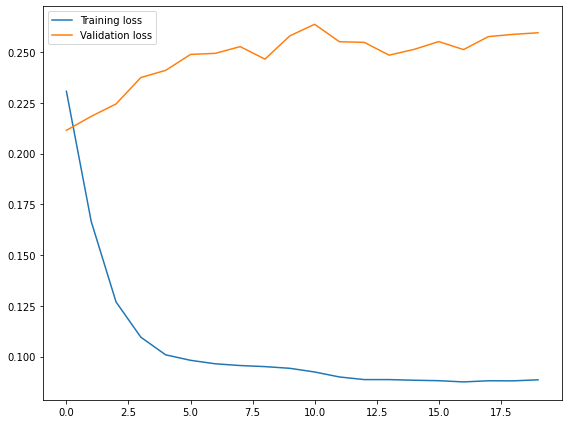

In [ ]:
# Predict
pred = model.predict(X_test)
pred_df = pd.DataFrame(pred)
# Save weights over training
model_history = pd.DataFrame(history.history)
model_history['epoch'] = history.epoch

# Check training loss
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize=(8,6))
num_epochs = model_history.shape[0]
ax.plot(np.arange(0, num_epochs), model_history["loss"],
        label="Training loss")
ax.plot(np.arange(0, num_epochs), model_history["val_loss"],
        label="Validation loss")
ax.legend()
plt.tight_layout()
plt.show()

We wil create a function to save and plot the weights

In [ ]:
num_points = np.shape(y_train)[0]
#calculate W1_F using average of 6981 results
from statistics import mean

#calculate W1_F using average of 6981 results
from statistics import mean
W1_F = []
for i in range(0, total_epoch):
  W1_F1 = []
  for j in range(0, num_points):
    W1_F1.append(epoch_y[i][j][0])
  W1_F.append(mean(W1_F1))

IndexError: ignored

In [ ]:
# funciton to save all weights
def save_weights(num_points, epoch_y,total_epoch):
  weight_dict = {}
  for w in range(6):
    weight_dict[w+1] = [i[w] for i in np.mean(epoch_y,1)]
  return pd.DataFrame(weight_dict)

Text(0.5, 1.0, 'Weights changing')

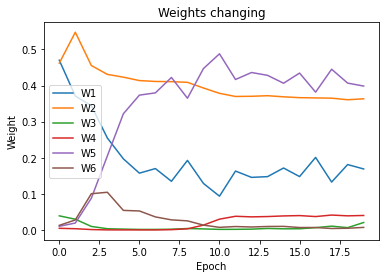

In [ ]:
weights = save_weights(num_points, epoch_y,total_epoch)
for w in range(6):
  plt.plot(weights[w+1], label='W'+str(w+1))
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Weight')
plt.title('Weights changing')

### Repeat the process for 10 or more times and summarize what does each weight converge to in a table (or similar) below.

In [ ]:
weight_table= pd.DataFrame(columns = ["W1","W2","W3","W4","W5","W6"])

for i in range(10):
  # create a feedforward model
  model = Sequential()
  input_size = X_train.shape[1]
  model.add(Dense(500, input_dim=input_size, activation='relu'))
  model.add(Dense(300, activation='relu'))
  model.add(Dense(200, activation='relu'))
  model.add(Dense(6, activation='softmax'))
  # Compile model
  model.compile(loss=custom_loss, optimizer='adam',metrics=[custom_accuracy,custom_precision,custom_recall,custom_F1])
  # call back function
  epoch_weights = []
  epoch_y = []
  epoch_num = []

  # Fit model
  total_epoch=20
  checkpoint = keras.callbacks.ModelCheckpoint("california.h5", save_best_only=True)
  history = model.fit(X_train, y_train_scores, epochs=total_epoch, batch_size=200, verbose=0, callbacks=[checkpoint, CustomCallback(model, X_train, y_train)],validation_data=(X_test, y_test_scores))
  # Final evaluation of the model
  scores = model.evaluate(X_test, y_test_scores, verbose=1)
  print("CNN loss: %.4f%%" % (scores[0]))
  print("CNN accuracy: %.2f%%" % (scores[1]*100))
  print("CNN precision: %.2f%%" % (scores[2]*100))
  print("CNN recall: %.2f%%" % (scores[3]*100))
  print("CNN F1 measure: %.2f%%" % (scores[4]*100))

  # Predict
  pred = model.predict(X_test)
  pred_df = pd.DataFrame(pred)
  # Save weights over training
  model_history = pd.DataFrame(history.history)
  model_history['epoch'] = history.epoch

  weights = save_weights(num_points, epoch_y,total_epoch)
  # save the weights from the last epoch
  weight_table.loc[len(weight_table)] = weights.iloc[19]

print(weight_table)

55/55 [==============================] - 0s 3ms/step - loss: 0.2676 - custom_accuracy: 0.6692 - custom_precision: 0.6210 - custom_recall: 0.5715 - custom_F1: 0.5836
CNN loss: 0.2676%
CNN accuracy: 66.92%
CNN precision: 62.10%
CNN recall: 57.15%
CNN F1 measure: 58.36%
55/55 [==============================] - 0s 3ms/step - loss: 0.2768 - custom_accuracy: 0.6726 - custom_precision: 0.6183 - custom_recall: 0.5410 - custom_F1: 0.5677
CNN loss: 0.2768%
CNN accuracy: 67.26%
CNN precision: 61.83%
CNN recall: 54.10%
CNN F1 measure: 56.77%
55/55 [==============================] - 0s 3ms/step - loss: 0.2603 - custom_accuracy: 0.6835 - custom_precision: 0.6304 - custom_recall: 0.6123 - custom_F1: 0.6129
CNN loss: 0.2603%
CNN accuracy: 68.35%
CNN precision: 63.04%
CNN recall: 61.23%
CNN F1 measure: 61.29%
55/55 [==============================] - 0s 3ms/step - loss: 0.2614 - custom_accuracy: 0.6684 - custom_precision: 0.6129 - custom_recall: 0.6135 - custom_F1: 0.6011
CNN loss: 0.2614%
CNN accuracy:

### Based on the summary of your final weights in the table above, which features are deemed most important?

### Does it make sense?

### Show the classification report of your trained model.    
### Comment on how many of your representative sentences actually show up in the Summary section.


** We lowered the threshold in our code because the important sentences were not being predicted to be important. We thought that since there are less important sentences than regular sentences it might help to decrease the threshold for what would classify as an important sentence.

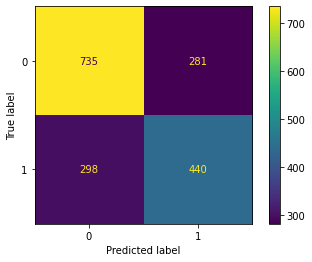

In [ ]:
### Define a prediciton funciton
F_pred = pred_df.iloc[:,0] * F1_test + pred_df.iloc[:,1] * F2_test + pred_df.iloc[:,2] * F3_test + pred_df.iloc[:,3] * F4_test + pred_df.iloc[:,4] * F5_test + pred_df.iloc[:,5] * F6_test
y_pred = F_pred > th


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### Use Grid search with hyperparameter to find an optimal NN
- must have at least 4 parameters with 3 variations or more on each parameter.   
- Show the optimal paramter set and the optimal results with the optimal grid hyperparameters (in the form of a classification report, F1 score)

In [ ]:
'''
# different activation of internal layers (relu, relu6, swish)
# different number of neurons in the hidden layers (20, 50, 80)
# different learning rate ()
# different batch size (200, 500, 800)
#### 81 combinations !!!!
#### How can we store the scores in a way that makes sense??
####### each row is a combination but we need to keep track of what combination is where
########### Maybe we can concatinate all the options as a string and save them next to the scores
########### df [ "relu 20 0.01 200", scores]
def experiments():
  internal_layer = ['relu','relu6','swish']
  num_neurons = [20,50,80]
  learning_rates = [0.1, 0.01, 0.001]
  batch_size = [200, 500, 800]
  counter = 0
  column_names = ["Internal Layer", "Neurons in Hidden Layer",
                  "Learnning Rate", "Batch Size", "loss", "accuracy", "precision",
                  "recall" , "F1"]
  grid_search_scores = pd.DataFrame(columns = column_names)

  for cur_layer in internal_layer:
    for cur_neur in num_neurons:
      for cur_l in learning_rates:
        for cur_batch in batch_size:
          model = Sequential()
          input_size = X_train.shape[1]
          if cur_layer == 'relu6':
            model.add(Dense(cur_neur, input_dim=input_size, activation=tf.nn.relu6))
            model.add(Dense(cur_neur, activation=tf.nn.relu6))
            model.add(Dense(cur_neur, activation=tf.nn.relu6))
          elif cur_layer == 'swish':
            model.add(Dense(cur_neur, input_dim=input_size, activation=tf.keras.activations.swish))
            model.add(Dense(cur_neur, activation=tf.keras.activations.swish))
            model.add(Dense(cur_neur, activation=tf.keras.activations.swish))
          else :
            model.add(Dense(cur_neur, input_dim=input_size, activation=cur_layer))
            model.add(Dense(cur_neur, activation=cur_layer))
            model.add(Dense(cur_neur, activation=cur_layer))

          model.add(Dense(6, activation='softmax'))
          # Compile model
          opt = keras.optimizers.Adam(learning_rate=cur_l)
          model.compile(loss=custom_loss, optimizer=opt,metrics=[custom_accuracy,custom_precision,custom_recall,custom_F1])
          # call back function
          epoch_weights = []
          epoch_y = []
          epoch_num = []
          # Fit model
          total_epoch=20
          #checkpoint = keras.callbacks.ModelCheckpoint("california.h5", save_best_only=True)
          history = model.fit(X_train, y_train_scores, epochs=total_epoch, batch_size=cur_batch, verbose=0, validation_data=(X_test, y_test_scores))
          # Final evaluation of the model
          scores = model.evaluate(X_test, y_test_scores, verbose=0)
          df = pd.DataFrame([[cur_layer, cur_neur, cur_l, cur_batch, scores[0], scores[1], scores[2], scores[3], scores[4]]], columns = column_names)
          grid_search_scores = pd.concat([grid_search_scores, df], axis=0)
          grid_search_scores.reset_index(drop=True, inplace=True)
  return grid_search_scores
'''

'\n# different activation of internal layers (relu, relu6, swish)\n# different number of neurons in the hidden layers (20, 50, 80)\n# different learning rate ()\n# different batch size (200, 500, 800)\n#### 81 combinations !!!!\n#### How can we store the scores in a way that makes sense??\n####### each row is a combination but we need to keep track of what combination is where\n########### Maybe we can concatinate all the options as a string and save them next to the scores\n########### df [ "relu 20 0.01 200", scores]\ndef experiments():\n  internal_layer = [\'relu\',\'relu6\',\'swish\']\n  num_neurons = [20,50,80]\n  learning_rates = [0.1, 0.01, 0.001]\n  batch_size = [200, 500, 800]\n  counter = 0\n  column_names = ["Internal Layer", "Neurons in Hidden Layer",\n                  "Learnning Rate", "Batch Size", "loss", "accuracy", "precision",\n                  "recall" , "F1"]\n  grid_search_scores = pd.DataFrame(columns = column_names)\n\n  for cur_layer in internal_layer:\n    fo

In [ ]:
'''
results = experiments()
'''

'\nresults = experiments()\n'

In [ ]:
#results.to_csv('combination_results.csv')

Optimal paramters are

In [ ]:
# create a feedforward model
model = Sequential()
input_size = X_train.shape[1]
model.add(Dense(50, input_dim=input_size, activation=tf.nn.relu6))
model.add(Dense(50, activation=tf.nn.relu6))
model.add(Dense(50, activation=tf.nn.relu6))
model.add(Dense(6, activation='softmax'))
# Compile model
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss=custom_loss, optimizer=opt,metrics=[custom_accuracy,custom_precision,custom_recall,custom_F1])
# call back function
epoch_weights = []
epoch_y = []
epoch_num = []
# define your custom callback for prediction
class CustomCallback(keras.callbacks.Callback):
    def __init__(self, model, x_test, y_test):
        self.model = model
        self.x_test = x_test
        self.y_test = y_test

    def on_epoch_end(self, epoch, logs={}):
        y_pred = self.model.predict(self.x_test)
        epoch_y.append(y_pred)
        epoch_num.append(epoch)

# Fit model
total_epoch=20
checkpoint = keras.callbacks.ModelCheckpoint("california.h5", save_best_only=True)
history = model.fit(X_train, y_train_scores, epochs=total_epoch, batch_size=800, verbose=0, callbacks=[checkpoint, CustomCallback(model, X_train, y_train)],validation_data=(X_test, y_test_scores))

# Final evaluation of the model
scores = model.evaluate(X_test, y_test_scores, verbose=1)
print("CNN loss: %.4f%%" % (scores[0]))
print("CNN accuracy: %.2f%%" % (scores[1]*100))
print("CNN precision: %.2f%%" % (scores[2]*100))
print("CNN recall: %.2f%%" % (scores[3]*100))
print("CNN F1 measure: %.2f%%" % (scores[4]*100))

NameError: ignored

55/55 [==============================] - 0s 3ms/step


Text(0.5, 1.0, 'Weights changing')

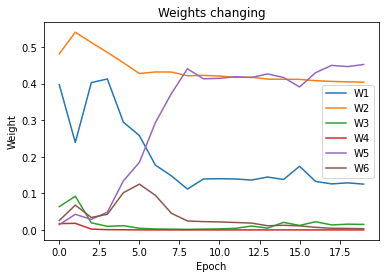

In [ ]:
# Predict
pred_best = model.predict(X_test)
pred_best_df = pd.DataFrame(pred_best)
# Save weights over training
model_history = pd.DataFrame(history.history)
model_history['epoch'] = history.epoch
weights = save_weights(num_points, epoch_y,total_epoch)

weights = save_weights(num_points, epoch_y,total_epoch)
for w in range(6):
  plt.plot(weights[w+1], label='W'+str(w+1))
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Weight')
plt.title('Weights changing')

These weights seem reasonable as we though W1 would be the most important although it is surprising that W2 had one of the highest importances.

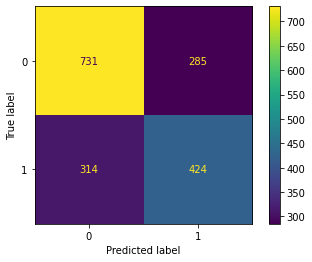

In [ ]:
### Define a prediciton funciton
F_pred = pred_best_df.iloc[:,0] * F1_test + pred_best_df.iloc[:,1] * F2_test + pred_best_df.iloc[:,2] * F3_test + pred_best_df.iloc[:,3] * F4_test + pred_best_df.iloc[:,4] * F5_test + pred_best_df.iloc[:,5] * F6_test
y_pred_best = F_pred > th

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()